Accuracy: 0.34616189081782056
Feature Importance:
remainder__Annual Income: 0.5536015586676922
remainder__Gender: 0.052987702916585624
cat__Color_Red: 0.024634760152367076
cat__Color_Pale White: 0.019132088144159357
cat__Body Style_SUV: 0.008880757857110408
cat__Body Style_Hardtop: 0.007577949487827501
cat__Body Style_Hatchback: 0.006615832645792652
cat__Company_Pontiac: 0.006614602738294022
cat__Company_Honda: 0.005889223973527709
cat__Color_Black: 0.005833179928205396
cat__Model_528i: 0.0050066335334234
cat__Model_Diamante: 0.004953492950069063
cat__Company_Lexus: 0.004917633305628047
cat__Body Style_Passenger: 0.004655223865201893
cat__Company_Chrysler: 0.00456613002535192
cat__Model_Montero Sport: 0.004061549122752616
cat__Model_Neon: 0.003816573985725006
cat__Company_Audi: 0.003632492306651523
cat__Model_Carrera Coupe: 0.003540913254225007
cat__Model_Metro: 0.0035383129867420974
cat__Model_3000GT: 0.003486042696749688
cat__Model_S-Class: 0.0034423169878922757
cat__Engine_DoubleÂ O

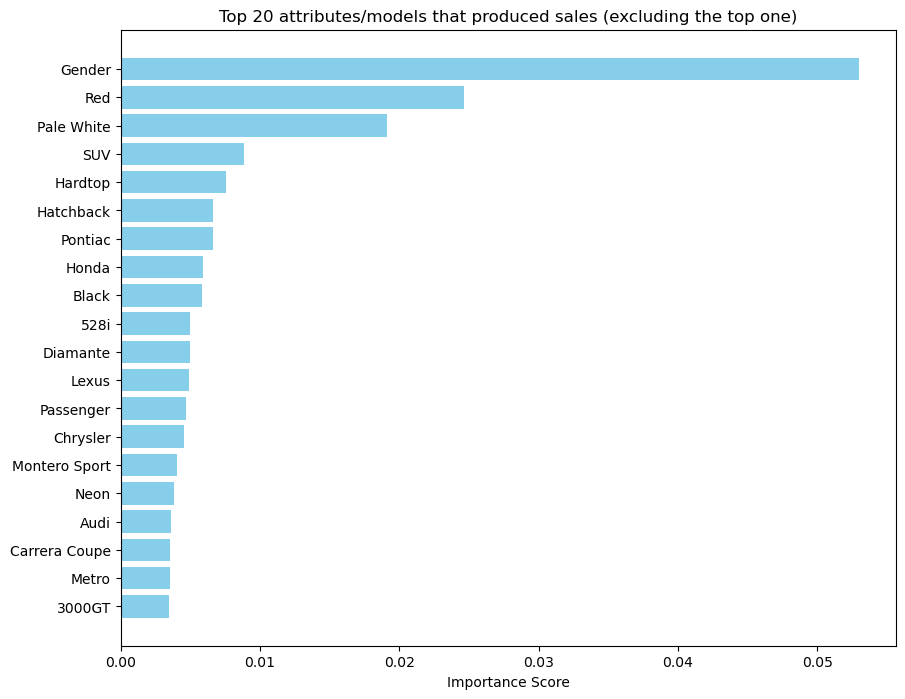

Feature Importance for High Income Group:
remainder__Annual Income: 0.6139096287890978
remainder__Gender: 0.05389788198506273
cat__Color_Pale White: 0.018229559349556355
cat__Color_Red: 0.01712203227079974
cat__Body Style_SUV: 0.008643104309307358
cat__Body Style_Hardtop: 0.008331455851581984
cat__Body Style_Hatchback: 0.006718288148004642
cat__Body Style_Passenger: 0.005955583841941436
cat__Company_Pontiac: 0.005255992911501983
cat__Color_Black: 0.004989946825703299
cat__Company_Chrysler: 0.004657869197553945
cat__Model_528i: 0.0041242904397992795
cat__Model_Diamante: 0.0037115901796258882
cat__Company_Lexus: 0.0036987511328829188
cat__Model_Montero Sport: 0.003662187248887283
cat__Company_Volkswagen: 0.0036281340344818556
cat__Body Style_Sedan: 0.003612320167633593
cat__Model_Neon: 0.0034514806412501704
cat__Model_S40: 0.003396209870359965
cat__Company_Chevrolet: 0.0033668967628799787
cat__Company_Honda: 0.0031224363064824207
cat__Model_Park Avenue: 0.0030770465500212073
cat__Company

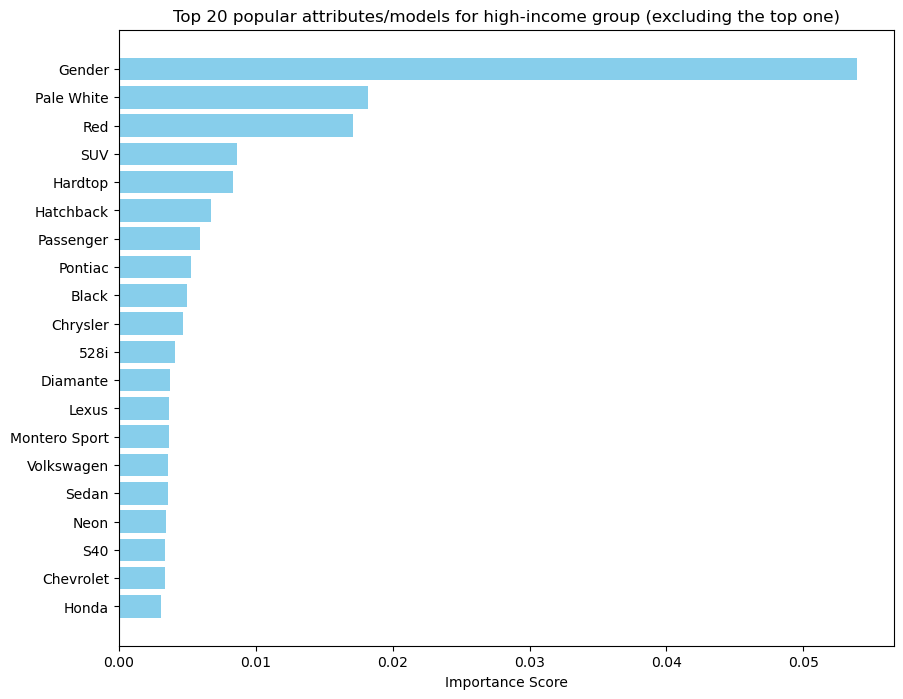

Feature Importance for Male Group:
remainder__Annual Income: 0.5444348030595507
cat__Color_Pale White: 0.03114927707362199
cat__Color_Red: 0.023842570283721057
cat__Body Style_Hardtop: 0.010206883564453843
cat__Body Style_SUV: 0.009428878369800473
cat__Body Style_Hatchback: 0.007193210142903581
cat__Model_3000GT: 0.005877136495899806
cat__Company_Chrysler: 0.005825967153538591
cat__Body Style_Sedan: 0.005793280318389496
cat__Color_Black: 0.005655550211647514
cat__Company_Lexus: 0.005405186012773021
cat__Company_Honda: 0.005341578547491075
cat__Model_RL: 0.005137054482729262
cat__Model_Montero Sport: 0.005126327012751835
cat__Model_Neon: 0.004662991688759945
cat__Model_Sunfire: 0.00446197342131124
cat__Model_Tacoma: 0.004451967945364859
cat__Model_A6: 0.004379676480394652
cat__Model_SLK: 0.004020750391624981
cat__Model_Carrera Coupe: 0.0039567822298321054
cat__Model_Diamante: 0.0037892707617371083
cat__Company_Lincoln: 0.003715730872950589
cat__Model_GS400: 0.003685841357017801
cat__Mod

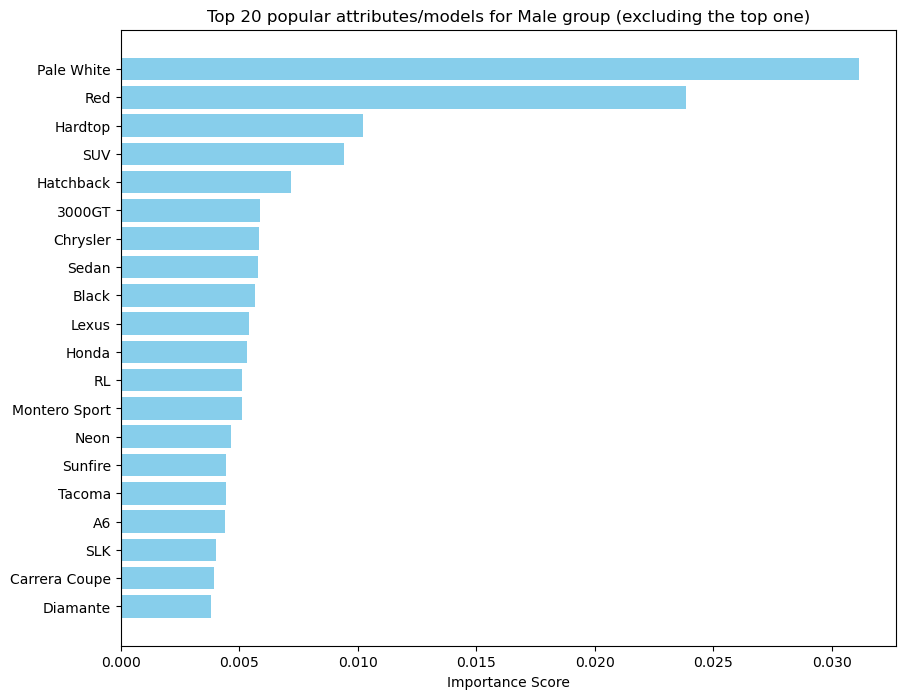

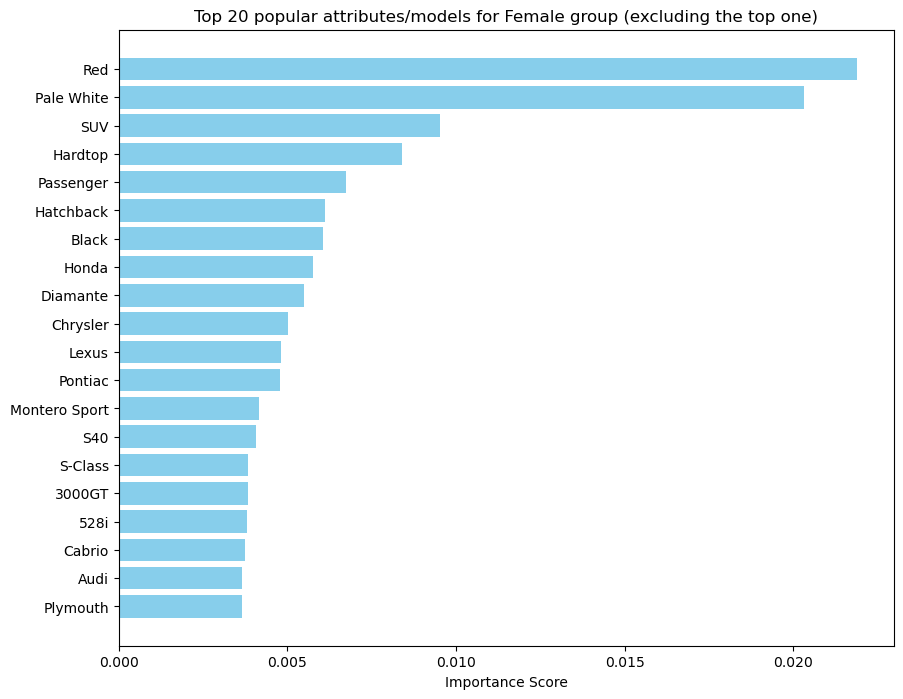

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("car_data.csv")

# Drop missing values
data.dropna(inplace=True)

# Drop columns we won't use
data = data.drop(['Car id', 'Date', 'Customer Name', 'Dealer_Name', 'Dealer No', 'Phone', 'Dealer_Region'], axis=1)

# Convert Gender column to numeric
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split dataset into features and target variable
X = data.drop('Price ($)', axis=1)
y = data['Price ($)']

# One-hot encode categorical variables
categorical_cols = ['Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict popularity of car models
y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Analyze important features
importance = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores
top_features = [f.split('_')[-1] for f, _ in sorted_importance[1:21]]  # Skip the first element
top_importance_scores = [importance for _, importance in sorted_importance[1:21]]  # Skip the first element

# Plot top 20 attributes/models that produced sales (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features, top_importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 attributes/models that produced sales (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Filter dataset based on Annual Income > 100000
data_high_income = data[data['Annual Income'] > 100000]

# Split dataset into features and target variable
X_high_income = data_high_income.drop('Price ($)', axis=1)
y_high_income = data_high_income['Price ($)']

# One-hot encode categorical variables
X_high_income = preprocessor.transform(X_high_income)

# Train the decision tree classifier
clf_high_income = DecisionTreeClassifier()
clf_high_income.fit(X_high_income, y_high_income)

# Analyze important features for high-income group
importance_high_income = clf_high_income.feature_importances_
feature_names_high_income = preprocessor.get_feature_names_out()
feature_importance_high_income = dict(zip(feature_names_high_income, importance_high_income))
sorted_importance_high_income = sorted(feature_importance_high_income.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance for High Income Group:")
for feature, importance in sorted_importance_high_income:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores for high-income group
top_features_high_income = [f.split('_')[-1] for f, _ in sorted_importance_high_income[1:21]]  # Skip the first element
top_importance_scores_high_income = [importance for _, importance in sorted_importance_high_income[1:21]]  # Skip the first element

# Plot top 20 popular attributes/models for high-income group (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features_high_income, top_importance_scores_high_income, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for high-income group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Filter dataset based on Gender
data_male = data[data['Gender'] == 0]  # Assuming 0 represents Male
data_female = data[data['Gender'] == 1]  # Assuming 1 represents Female

# Split dataset into features and target variable for Male and Female groups
X_male = data_male.drop('Price ($)', axis=1)
y_male = data_male['Price ($)']
X_female = data_female.drop('Price ($)', axis=1)
y_female = data_female['Price ($)']

# One-hot encode categorical variables for Male and Female groups
X_male = preprocessor.transform(X_male)
X_female = preprocessor.transform(X_female)

# Train the decision tree classifier for Male and Female groups
clf_male = DecisionTreeClassifier()
clf_female = DecisionTreeClassifier()
clf_male.fit(X_male, y_male)
clf_female.fit(X_female, y_female)

# Analyze important features for Male and Female groups
importance_male = clf_male.feature_importances_
importance_female = clf_female.feature_importances_
feature_names_male = preprocessor.get_feature_names_out()
feature_names_female = preprocessor.get_feature_names_out()
feature_importance_male = dict(zip(feature_names_male, importance_male))
feature_importance_female = dict(zip(feature_names_female, importance_female))
sorted_importance_male = sorted(feature_importance_male.items(), key=lambda x: x[1], reverse=True)
sorted_importance_female = sorted(feature_importance_female.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance for Male Group:")
for feature, importance in sorted_importance_male:
    print(f"{feature}: {importance}")

print("Feature Importance for Female Group:")
for feature, importance in sorted_importance_female:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores for Male and Female groups
top_features_male = [f.split('_')[-1] for f, _ in sorted_importance_male[1:21]]  # Skip the first element
top_features_female = [f.split('_')[-1] for f, _ in sorted_importance_female[1:21]]  # Skip the first element
top_importance_scores_male = [importance for _, importance in sorted_importance_male[1:21]]  # Skip the first element
top_importance_scores_female = [importance for _, importance in sorted_importance_female[1:21]]  # Skip the first element

# Plot top 20 popular attributes/models for Male and Female groups (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features_male, top_importance_scores_male, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for Male group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(top_features_female, top_importance_scores_female, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for Female group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()